Sampel Data:
   Umur  Tekanan Darah  Kolesterol  Detak Jantung  Risiko
0    68            147         297            145       1
1    58            122         296            123       0
2    44            161         239            131       0
3    37            136         296            146       0
4    50            143         297            122       0

Hasil Training Model:
Intercept: -27.51
Koefisien per fitur:
- Umur: 0.17
- Tekanan Darah: 0.06
- Kolesterol: 0.06
- Detak Jantung: -0.06

Evaluasi Model:
Akurasi: 0.95
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.75      0.86         4

    accuracy                           0.95        20
   macro avg       0.97      0.88      0.91        20
weighted avg       0.95      0.95      0.95        20



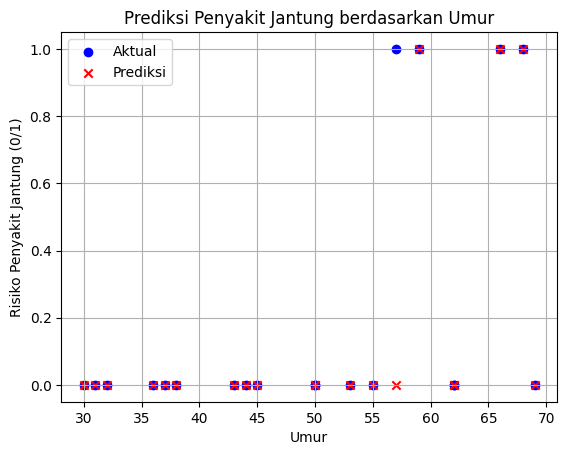

Model berhasil disimpan sebagai 'model_prediksi_penyakit_jantung.pkl'


In [10]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pickle
import os

# Buat folder penyimpanan model jika belum ada
os.makedirs("models", exist_ok=True)

# 1. Membuat dataset simulasi (dummy) untuk prediksi penyakit jantung
np.random.seed(42)

# Simulasi fitur-fitur kesehatan
#Usia 30–70 tahun
#Tekanan darah 100–180
#Kolesterol 150–300
#Detak jantung 100–180
umur = np.random.randint(30, 70, 100).reshape(-1, 1)             # usia 30–70 tahun
tekanan_darah = np.random.randint(100, 180, 100).reshape(-1, 1)  # tekanan darah sistolik
kolesterol = np.random.randint(150, 300, 100).reshape(-1, 1)     # kolesterol total
detak_jantung = np.random.randint(100, 180, 100).reshape(-1, 1)  # detak jantung maksimal

# Label: Risiko penyakit jantung (0 = tidak, 1 = berisiko)
# Kombinasi fitur-fitur mempengaruhi kemungkinan risiko
risiko = ((umur > 50) & (tekanan_darah > 140) & (kolesterol > 240)).astype(int).ravel()

# Gabungkan fitur
X = np.hstack((umur, tekanan_darah, kolesterol, detak_jantung))
Y = risiko

# Tampilkan beberapa sampel data
df = pd.DataFrame(X, columns=["Umur", "Tekanan Darah", "Kolesterol", "Detak Jantung"])
df["Risiko"] = Y
print("Sampel Data:")
print(df.head())

# 2. Membagi dataset menjadi training dan testing 80% data untuk training, 20% untuk testing.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 3. Membuat model Logistic Regression
model = LogisticRegression()
model.fit(X_train, Y_train)

# 4. Menampilkan hasil training model
print("\nHasil Training Model:")
print(f"Intercept: {model.intercept_[0]:.2f}")
print("Koefisien per fitur:")
for fitur, coef in zip(["Umur", "Tekanan Darah", "Kolesterol", "Detak Jantung"], model.coef_[0]):
    print(f"- {fitur}: {coef:.2f}")

# 5. Prediksi pada data uji
Y_pred = model.predict(X_test)

# 6. Evaluasi model
accuracy = accuracy_score(Y_test, Y_pred)
print("\nEvaluasi Model:")
print(f"Akurasi: {accuracy:.2f}")
print(classification_report(Y_test, Y_pred))

# 7. Visualisasi (Umur vs Risiko)
plt.scatter(X_test[:, 0], Y_test, color="blue", label="Aktual")
plt.scatter(X_test[:, 0], Y_pred, color="red", marker="x", label="Prediksi")
plt.xlabel("Umur")
plt.ylabel("Risiko Penyakit Jantung (0/1)")
plt.legend()
plt.title("Prediksi Penyakit Jantung berdasarkan Umur")
plt.grid(True)
plt.show()

# 8. Simpan model ke file
with open("models/model_prediksi_penyakit_jantung.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model berhasil disimpan sebagai 'model_prediksi_penyakit_jantung.pkl'")
